# Star Wars Survey
## Introduction
In this project, we're going to clean and explore a dataset of the Star Wars survey (July 2014). The data was collected by the [FiveThirtyEight](https://fivethirtyeight.com) team before the release of [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens), to answer the following question: **"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**. For this investigation, 835 Star Wars fans were surveyed using the online tool SurveyMonkey. The results are available in [this dataset](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv), which we're going to download and use in our analysis.
### Summary of Results
We found out that **"Star Wars: Episode V The Empire Strikes Back" is indeed the highest-ranked and the most viewed of all, both overall and by different categories of people**. A general trend is that the original films are higher-ranked and were viewed by more people than those of the prequel trilogy. The following categories of people are more interested in Star Wars: men, people who are 30-44 y.o., people with the income from 50,000$. Less interested: women, people older than 60. Around a half of all the respondents have seen all the films, around 1/4 – none of them, and a strong correlation was found between being a fan of Star Wars and having seen all the films. Among the viewers, there are about 2/3 of fans of Star Wars. People who are familiar with the Expanded Universe, or are fans of Star Trek, tend to be also fans of Star Wars. The least familiar character is Padme Amidala, the most familiar – Luke Skywalker, the most favorite – Han Solo, the least favorite – Jar Jar Binks, the most controversial – Emperor Palpatine, the most non-indifferent – Darth Vader.
## Data Reading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

Some preliminary observations:

- Star Wars seem to be popular among the men 18-29 y.o.
- The row [0]: a missing `'RespondentID'`, many other values are inconsistent with the rest of the table.
- In the column name `'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'`there are some symbols not interpreted by the encoding. To avoid error warnings in future, we'll rename this column right now.

In [2]:
# Renaming the column with non-encoded symbols
star_wars = star_wars.rename(columns={
    'Do you consider yourself to be a fan of the Expanded Universe?æ': 
    'Do you consider yourself to be a fan of the Expanded Universe?'
    })

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The dataset contains information about the age, gender, education, geographical location, and income of respondents, together with their answers to the survey questions.

In [4]:
star_wars.shape

(1187, 38)

There are 1187 rows and 38 columns in the dataset.

Earlier, we noticed that the row [0] has a missing `'RespondentID'`, and also other values look strange. We're going to remove it, as well as the other rows with missing `'RespondentID'`. But first, let's take a look at this row, since it can be a part of the table header.

In [5]:
star_wars.iloc[0, :]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

Our assumption was correct: this row indeed contains some information about the dataset columns, so we can use it in future for renaming the columns from `'Unnamed...'` to something more descriptive. Hence, we'll save this row in a separate dataframe and then remove all the rows with a missing `'RespondentID'` from our main dataset.

In [6]:
column_name_decoding = star_wars.iloc[0, :].to_frame()

# Removing invalid rows with a missing 'RespondentID'
star_wars = star_wars[star_wars['RespondentID'].notnull()].reset_index(drop=True)

star_wars.shape

(1186, 38)

We see that it was the only row with a missing value of `'RespondentID'`.
## Cleaning and Mapping Yes/No Columns
In our dataset, there are some columns represented by Yes/No questions (or NaN, where a respondent didn't answer): `'Have you seen any of the 6 films in the Star Wars franchise?'`, `'Do you consider yourself to be a fan of the Star Wars film franchise?'`, `'Are you familiar with the Expanded Universe?'`, `'Do you consider yourself to be a fan of the Expanded Universe?'`, `'Do you consider yourself to be a fan of the Star Trek franchise?'`

We'll convert them to the Boolean type to make the data easier to analyze.


In [7]:
# Creating a dictionary for mapping yes/no column values
yes_no = {
    'Yes': True,
    'No': False
}

# Creating a list of the Yes/No columns
yes_no_columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
                  'Do you consider yourself to be a fan of the Star Wars film franchise?',
                  'Are you familiar with the Expanded Universe?',
                  'Do you consider yourself to be a fan of the Expanded Universe?',
                  'Do you consider yourself to be a fan of the Star Trek franchise?']

# Converting the Yes/No columns to the Boolean type
for column in yes_no_columns:
    star_wars[column] = star_wars[column].map(yes_no)

## Cleaning and Mapping Checkbox Columns
The columns from 3 to 8 inclusive represent a single checkbox question. The respondent checked off a series of boxes in response to the question: **"Which of the following Star Wars films have you seen? Please select all that apply"**. For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, but first, let's look at the names of these columns.

In [8]:
star_wars.iloc[:, 3:9].head(2)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN


We'll need also to rename each `'Unnamed...'` column into something more intuitive. 

Let's take a look at our auxiliary dataframe `column_name_decoding` that we created earlier.

In [9]:
# Using the auxiliary column_name_decoding dataframe for illustrative purposes 
column_name_decoding[3:9]

,0
Which of the following Star Wars films have you seen? Please select all that apply.,Star Wars: Episode I The Phantom Menace
Unnamed: 4,Star Wars: Episode II Attack of the Clones
Unnamed: 5,Star Wars: Episode III Revenge of the Sith
Unnamed: 6,Star Wars: Episode IV A New Hope
Unnamed: 7,Star Wars: Episode V The Empire Strikes Back
Unnamed: 8,Star Wars: Episode VI Return of the Jedi


We can use these values (the movie names) for creating a dictionary, which we'll apply then to convert each of the columns 3 to 8 of the `star_wars` dataset to a Boolean, as described above.

In [10]:
# Creating a dictionary for mapping checkbox column values
title_mapping = {}

for column_name in column_name_decoding.iloc[3:9, 0]:
    title_mapping[column_name] = True
title_mapping[np.nan] = False
    
title_mapping

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 nan: False}

In [11]:
# Converting the checkbox columns to the Boolean type
for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(title_mapping)
    
# Renaming the checkbox columns     
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
})

## Cleaning the Ranking Columns
The columns from 9 to 14 inclusive ask the respondent to rank the Star Wars movies in order of most favorite to least favorite (from 1 to 6). Each column represents a movies, according to the scheme below:

In [12]:
# Using the auxiliary column_name_decoding dataframe for illustrative purposes 
column_name_decoding[9:15]

,0
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Star Wars: Episode I The Phantom Menace
Unnamed: 10,Star Wars: Episode II Attack of the Clones
Unnamed: 11,Star Wars: Episode III Revenge of the Sith
Unnamed: 12,Star Wars: Episode IV A New Hope
Unnamed: 13,Star Wars: Episode V The Empire Strikes Back
Unnamed: 14,Star Wars: Episode VI Return of the Jedi


We'll need to convert these ranking columns to numeric, then rename them something more intuitive.

In [13]:
# Converting the ranking columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Renaming the ranking columns     
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
})

## Cleaning and Mapping Radio-Button Columns
The columns from 15 to 28 inclusive represent questions of radio-button type, where the respondents had to choose one answer for each of the 14 characters of Star Wars. The question for each character was the same: 
**"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."**

To find the correspondence between each column name and the character it represents, let's have a look again at the auxiliary `column_name_decoding` dataframe:

In [14]:
# Using the auxiliary column_name_decoding dataframe for illustrative purposes 
column_name_decoding[15:29]

,0
"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Han Solo
Unnamed: 16,Luke Skywalker
Unnamed: 17,Princess Leia Organa
Unnamed: 18,Anakin Skywalker
Unnamed: 19,Obi Wan Kenobi
Unnamed: 20,Emperor Palpatine
Unnamed: 21,Darth Vader
Unnamed: 22,Lando Calrissian
Unnamed: 23,Boba Fett
Unnamed: 24,C-3P0


Now, we'll have a look at the unique options selected for all the characters by all the respondents.

In [15]:
# Selecting the radio-button columns
characters = star_wars.iloc[:, 15:29]

# Creating a list of unique options of all the radio-button columns
options = []
for column in characters.columns:
    options_column = characters[column].unique()
    for item in options_column:
        if item not in options:
            options.append(item)
options

['Very favorably',
 nan,
 'Somewhat favorably',
 'Neither favorably nor unfavorably (neutral)',
 'Somewhat unfavorably',
 'Unfamiliar (N/A)',
 'Very unfavorably']

We can rank these options analogically to the movie rankings: 1 – 'Very favorably', 2 – 'Somewhat favorably', 3 – 'Neither favorably nor unfavorably (neutral)', 4 – 'Somewhat unfavorably', 5 – 'Very unfavorably'. For now, we leave 'Unfamiliar (N/A)' values as the are.

Then, we'll rename the radio-button columns according to their characters using the auxiliary `column_name_decoding` dataframe.

In [16]:
# Creating a dictionary of character rankings
preferences = {
    'Very favorably': 1,
    'Somewhat favorably': 2,
    'Neither favorably nor unfavorably (neutral)': 3,
    'Somewhat unfavorably': 4,
    'Very unfavorably': 5    
}

# Replacing radio-button column values with rankings
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].replace(preferences)


# Creating a dictionary for mapping the character ranking column names
character_dict= {}
for i in range(len(star_wars.columns[15:29])):
    character_dict[star_wars.columns[15+i]] = column_name_decoding.iloc[15+i,0]
    
character_dict

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
 'Unnamed: 16': 'Luke Skywalker',
 'Unnamed: 17': 'Princess Leia Organa',
 'Unnamed: 18': 'Anakin Skywalker',
 'Unnamed: 19': 'Obi Wan Kenobi',
 'Unnamed: 20': 'Emperor Palpatine',
 'Unnamed: 21': 'Darth Vader',
 'Unnamed: 22': 'Lando Calrissian',
 'Unnamed: 23': 'Boba Fett',
 'Unnamed: 24': 'C-3P0',
 'Unnamed: 25': 'R2 D2',
 'Unnamed: 26': 'Jar Jar Binks',
 'Unnamed: 27': 'Padme Amidala',
 'Unnamed: 28': 'Yoda'}

In [17]:
# Renaming the character ranking columns     
star_wars = star_wars.rename(columns=character_dict)

## Finding the Highest-Ranked Movie
To find the highest-ranked movie (which in terms of our dataset means the movie with the smallest ranking), we need first to calculate mean ranking for each movie.

In [18]:
# Calculating the mean rankings
mean_rankings = star_wars[star_wars.columns[9:15]].mean().reset_index()
mean_rankings

,index,0
0,ranking_1,3.732934
1,ranking_2,4.087321
2,ranking_3,4.341317
3,ranking_4,3.272727
4,ranking_5,2.513158
5,ranking_6,3.047847


At this stage, it would be more convenient to rename each ranking of the `'mean_rankings'` dataframe to the corresponding episode and the column called 0 (not an index here!) to `'rankings'`. We're going to use the same approach also later in the project, so let's create a function for it.

In [19]:
# Defining a function for renaming labels and the 0 column
def rename_labels_column_name(df, old_labels, column_name):
    
    # Renaming old labels to the corresponding episodes
    df['index']= df['index'].str.replace(old_labels,'episode')
    
    # Renaming the 0 column
    df.rename(columns={0: column_name}, inplace=True)  
    
    # Resetting the index
    df = df.set_index('index', drop=True, inplace=True) 
        
# Renaming rankings to the corresponding episodes and the 0 column to 'rankings'
rename_labels_column_name(df=mean_rankings, 
                          old_labels='ranking',
                          column_name='rankings')

mean_rankings

,rankings
index,
episode_1,3.732934
episode_2,4.087321
episode_3,4.341317
episode_4,3.272727
episode_5,2.513158
episode_6,3.047847


Now, we can plot the movie rankings.

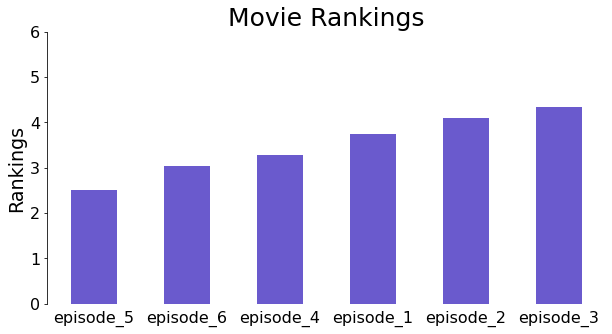

In [20]:
from matplotlib import pyplot as plt 
%matplotlib inline

# Defining a function for creating bar plots
def plot_bar(df, column, ylim_end, title, ylabel):
    fig, ax = plt.subplots(figsize=(10,5))
    df[column].sort_values().plot.bar(ylim = (0, ylim_end),
                                           color='slateblue',
                                           rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=19)
    ax.set_xlabel(None)
    ax.tick_params(axis='both', labelsize=16, bottom = False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plotting the mean rankings
plot_bar(df=mean_rankings,         
         column='rankings', 
         ylim_end=6,
         title='Movie Rankings',
         ylabel='Rankings')

The "Star Wars: Episode V The Empire Strikes Back" is the highest-ranked one. 

It's important to remember the chronological order of all the episodes of Star Wars (in this project, we take into account only those produced before 2015):  **Episode IV (1977) – V (1980) – IV (1983) – I (1999) – II (2002) – III (2005)**. Hence, our highest-ranked Episode V is actually the second one. 

In general, we can conclude that the first 3 movies (the original trilogy) have higher rankings than the next three. Starting already from the second movie, Episode V, the rankings are steadily lowering. This can reflect the tendency of the audience becoming a bit "saturated" with Star Wars, comparing the new episodes with the original ones, being nostalgic etc., which often happens with multi-released movies.
## Finding the Most Viewed Movie
Next, we're going to figure out how many people have seen each movie, and which movie was the most viewed.

In [21]:
# Calculating the number of True in each 'seen' column
sum_seen = star_wars[star_wars.columns[3:9]].sum().reset_index()
sum_seen

,index,0
0,seen_1,673
1,seen_2,571
2,seen_3,550
3,seen_4,607
4,seen_5,758
5,seen_6,738


Just as we did for the rankings, we'll rename each "seen" of this series to the corresponding episode and the column 0 (again, it's not an index here) to 'seen'.

In [22]:
# Renaming 'seen' to the corresponding episodes and the 0 column to 'seen'
rename_labels_column_name(df=sum_seen, 
                          old_labels='seen',
                          column_name='seen')

sum_seen

,seen
index,
episode_1,673
episode_2,571
episode_3,550
episode_4,607
episode_5,758
episode_6,738


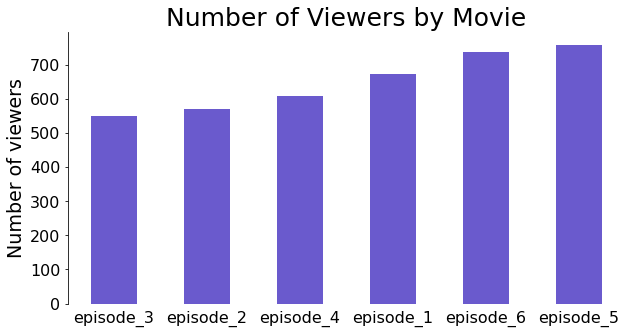

In [23]:
# Plotting the numbers of viewers
plot_bar(df=sum_seen, 
         column='seen', 
         ylim_end=None,
         title='Number of Viewers by Movie',
         ylabel='Number of viewers')

We see that "Star Wars: Episode V The Empire Strikes Back" is not only the highest-ranked movie, but also the most viewed one. 

In general, the trend here strongly reflects the one of rankings: the movies of the original trilogy (starting from the second one) were viewed by more people than the next three ones. When 16 years later from releasing the original trilogy the prequel trilogy was produced, the first of them (Episode I) was quite popular and was viewed by even more people than the historically first movie (Episode IV). It can indicate that people were curious to see the new release and probably "missed" Star Wars in those years. After that, the popularity of the two subsequent movies sharply dropped by 100 people. This can mean that the viewers satisfied their first curiousity, compared the original episodes with the new ones, and decided that the original ones were more worth viewing than the subsequent.
## Exploring the Data by Gender
Let's now repeat the same analysis by gender.
### Finding the Highest-Ranked Movie by Gender

In [24]:
# Splitting the dataframe on the 'Gender' column and selecting only the ranking columns 
males_rankings = star_wars[star_wars['Gender'] == 'Male'][star_wars.columns[9:15]]
females_rankings = star_wars[star_wars['Gender'] == 'Female'][star_wars.columns[9:15]]

# Calculating the mean ranking for each movie by gender
males_rankings_mean = males_rankings.mean().reset_index()
females_rankings_mean = females_rankings.mean().reset_index()

print(males_rankings_mean)
print('\n')
print(females_rankings_mean)

       index         0
0  ranking_1  4.037825
1  ranking_2  4.224586
2  ranking_3  4.274882
3  ranking_4  2.997636
4  ranking_5  2.458629
5  ranking_6  3.002364


       index         0
0  ranking_1  3.429293
1  ranking_2  3.954660
2  ranking_3  4.418136
3  ranking_4  3.544081
4  ranking_5  2.569270
5  ranking_6  3.078086


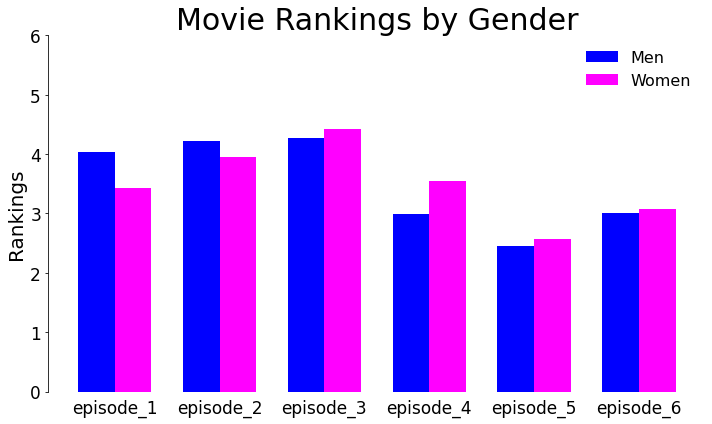

In [25]:
# Renaming male rankings to the corresponding episodes 
# and the 0 column to 'rankings'
rename_labels_column_name(df=males_rankings_mean, 
                          old_labels='ranking',
                          column_name='rankings')

# Renaming female rankings to the corresponding episodes 
# and the 0 column to 'rankings'
rename_labels_column_name(df=females_rankings_mean, 
                          old_labels='ranking',
                          column_name='rankings')

# Defining a function for creating grouped bar plots
def plot_grouped_bar(df1, df2, column, label1, label2, color1, color2, 
                     title, ylabel, ylim_end):
    
    # Converting series to lists for both subsets
    df1_list = df1[column].to_list()   
    df2_list = df2[column].to_list()
        
    # Creating labels from the index (identical for both subsets)
    labels = df1.index.to_list()
    
    # Specifying the label locations and the width of the bars
    x = np.arange(len(labels)) 
    width = 0.35
       
    # Plotting the data for both subsets using grouped bar chart
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x - width/2,
           df1_list,
           width, 
           label=label1,
           color=color1)
    ax.bar(x + width/2,
           df2_list, 
           width,
           label=label2, 
           color=color2)
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_ylim(0,ylim_end)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=17)
    ax.tick_params(bottom = False, labelsize=17)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.legend(loc=0, fontsize=16, frameon=False)
    fig.tight_layout()
    plt.show()

# Plotting a grouped bar chart for male and female rankings
plot_grouped_bar(df1=males_rankings_mean,
                 df2=females_rankings_mean,
                 column='rankings', 
                 label1='Men',
                 label2='Women',
                 color1='blue',
                 color2='fuchsia',
                 title='Movie Rankings by Gender', 
                 ylabel='Rankings',
                 ylim_end=6)

Like it was for all the rankings, the Episode V is the highest-ranked one among both men and women, and an overall tendency by gender is the same: the original trilogy is ranked higher than the next one, with a steady lowering of the rankings for each subsequent movie. 

We can notice, though, that the first movie of the first trilogy (Episode IV) was ranked about 0.5 tick higher by men, while the first movie of the second trilogy (Episode I) – equally higher by women. For both trilogies, the rankings of the subsequent movies were levelled out for both genders, showing faster dynamics for women.
### Finding the Most Viewed Movie by Gender
Now, we're going to find the most viewed movie by gender.

In [26]:
# Splitting the dataframe on the 'Gender' column and selecting only the 'seen' columns 
males_seen = star_wars[star_wars['Gender'] == 'Male'][star_wars.columns[3:9]]
females_seen = star_wars[star_wars['Gender'] == 'Female'][star_wars.columns[3:9]]

# Calculating the number of viewers for each movie by gender, 
# and sorting values in descending order
males_seen_sum = males_seen.sum().sort_values(ascending=False).reset_index()
females_seen_sum = females_seen.sum().sort_values(ascending=False).reset_index()

print(males_seen_sum)
print('\n')
print(females_seen_sum)

    index    0
0  seen_5  392
1  seen_6  387
2  seen_1  361
3  seen_4  342
4  seen_2  323
5  seen_3  317


    index    0
0  seen_5  353
1  seen_6  338
2  seen_1  298
3  seen_4  255
4  seen_2  237
5  seen_3  222


We see that in this case, after sorting the number of viewers for each movie by gender, we obtained the same succession of movies (and also the same one that we observed earlier for all the rankings): Episode V – VI – I – IV – II – III. Let's confirm it more accurately (obviously, this approach would be more important in case of more series and/or more values in each).

In [27]:
# Defining a function for checking if two successions coincide or not
def compare_successions(df1, df2):
    
    # Creating a boolean series to compare the sorted successions
    true_false = df1['index'] == df2['index']
    
    # Returning if all the values of the boolean series are True
    return true_false.sum() == len(true_false)

# Comparing the sorted successions for the numbers of male and female viewers
compare_successions(males_seen_sum, females_seen_sum)

True

Hence, we confirmed that the sorted movie successions by gender are equal, so we can use directly them for further plotting. It would be more illustrative than using the unsorted ones.

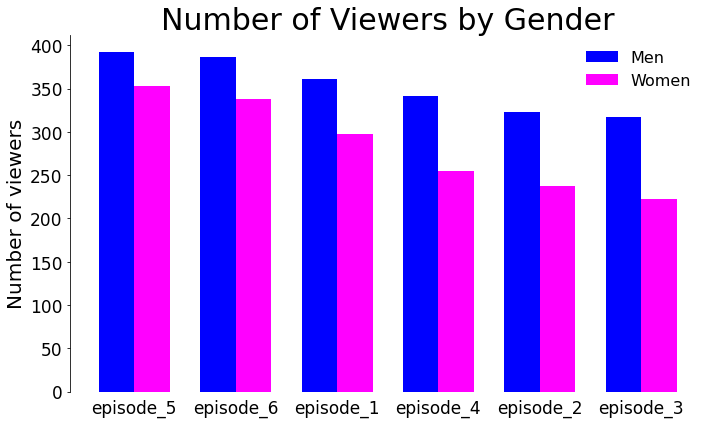

In [28]:
# Renaming numbers of male viewers to the corresponding episodes 
# and the 0 column to 'rankings'
rename_labels_column_name(df=males_seen_sum, 
                          old_labels='seen',
                          column_name='viewers')

# Renaming numbers of female viewers to the corresponding episodes  
# and the 0 column to 'rankings'
rename_labels_column_name(df=females_seen_sum, 
                          old_labels='seen',
                          column_name='viewers')

# Plotting a grouped bar chart for the numbers of male and female viewers
plot_grouped_bar(df1=males_seen_sum,
                 df2=females_seen_sum,
                 column='viewers', 
                 label1='Men',
                 label2='Women',
                 color1='blue',
                 color2='fuchsia',
                 title='Number of Viewers by Gender', 
                 ylabel='Number of viewers',
                 ylim_end=None)

The trend here reflects the one for all the viewers and, overall, the one for the rankings: Episode V is the most viewed by both genders, the movies of the original trilogy were mostly viewed by more people than the next three. 

Additionally, throughout the whole movie succession, we see an increasing gap between the numbers of male and female viewers. It can mean that women were losing interest to Star Wars more rapidly than men.
## Exploring the Data by Degree of Involvement
### Defining the Groups by Degree of Involvement
According to the degree of involvement, all the respondents of our dataset can be divided into the following groups:
1. Haven't seen any of the 6 films of Star Wars.
2. Have seen some of the films.
3. Have seen all the films.

The respondents from the last 2 groups can be further divided into fans and non-fans of Star Wars. We can assume that fans mostly have seen all the films and non-fans – only some of them. It could be a general trend indeed, but not necessarily an exact correspondence between these categories.

We're going to investigate the differences / common features between the groups above, then we'll drop the first group, since this category of respondents doesn't seem to give any additional value for further analysis (and also, most probably, contains a lot of missing values).
### Dealing with Missing Values
Let's start by finding out how many respondents haven't seen any of the 6 films.

In [29]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Hence, there is 21% of such respondents. Let's check how many missing values this subset has.

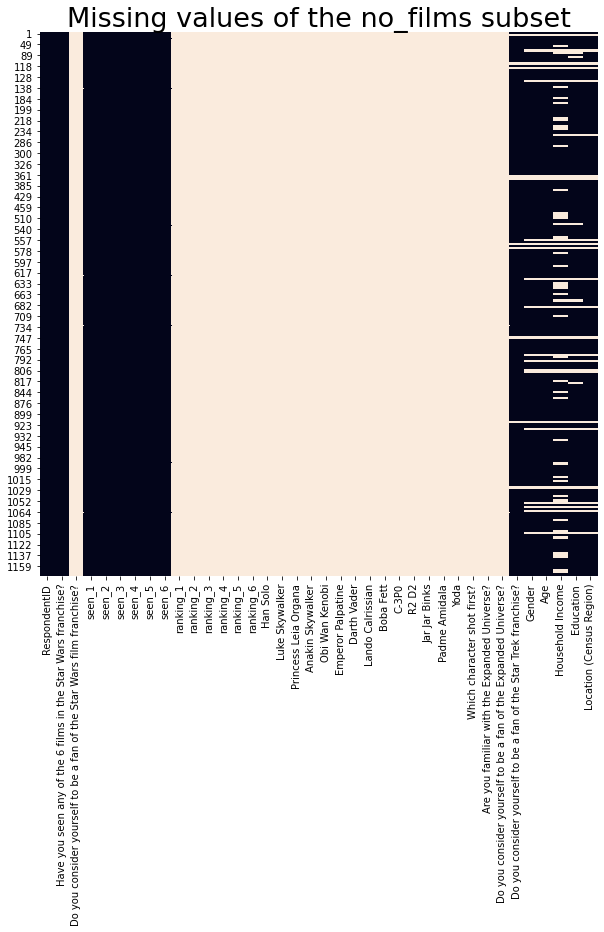

In [30]:
import seaborn as sns

# Creating a subset with only the people who haven't seen any of the films
no_films = star_wars[star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?']==False]

# Defining a function for plotting heatmaps of missing values
def plot_heatmap(df, title):
    fig, ax= plt.subplots(figsize=(10, 10))
    sns.heatmap(df.isnull(), cbar=False)
    ax.set_title(title, fontsize=27)

# Plotting a heatmap of missing values for the no_films subset
plot_heatmap(no_films, title='Missing values of the no_films subset')

As we assumed before, the majority of columns (those about rankings, favorite/unfavorite characters, some specific questions about Star Wars) for this subset is represented by only missing values (pale rose on the heatmap), which is quite logical. Actually, also some other columns (like the "seen" columns) are not very informative in this case, since they will probably contain only values like "No" or False. Let's check it.

In [31]:
# Printing all the unique values of the no_films subset
for column in no_films.columns[1:]:
    print(column, no_films[column].unique())

Have you seen any of the 6 films in the Star Wars franchise? [False]
Do you consider yourself to be a fan of the Star Wars film franchise? [nan]
seen_1 [False]
seen_2 [False]
seen_3 [False]
seen_4 [False]
seen_5 [False]
seen_6 [False]
ranking_1 [nan]
ranking_2 [nan]
ranking_3 [nan]
ranking_4 [nan]
ranking_5 [nan]
ranking_6 [nan]
Han Solo [nan]
Luke Skywalker [nan]
Princess Leia Organa [nan]
Anakin Skywalker [nan]
Obi Wan Kenobi [nan]
Emperor Palpatine [nan]
Darth Vader [nan]
Lando Calrissian [nan]
Boba Fett [nan]
C-3P0 [nan]
R2 D2 [nan]
Jar Jar Binks [nan]
Padme Amidala [nan]
Yoda [nan]
Which character shot first? [nan]
Are you familiar with the Expanded Universe? [nan]
Do you consider yourself to be a fan of the Expanded Universe? [nan]
Do you consider yourself to be a fan of the Star Trek franchise? [True nan False]
Gender ['Male' nan 'Female']
Age ['18-29' nan '30-44' '> 60' '45-60']
Household Income ['$0 - $24,999' nan '$50,000 - $99,999' '$25,000 - $49,999'
 '$100,000 - $149,999' 

Only the last 6 columns have some meaningful values and represent a potential interest for our analysis.

Let's now check if there are any missing values in the second subset, with the respondents who have seen at least some of the films. Before it, we'll create a column `'seen_summary'`, which will summarize how many films each respondent has seen, and look up what values it has. Also, we'll create a column `'seen_all_films'`, which will show if a respondent has seen all the films or not.

In [32]:
# Creating a column summarizing how many films each respondent has seen
star_wars['seen_summary'] = star_wars[star_wars.columns[3:9]].sum(axis=1)

# Creating a column showing if a respondent has seen all the films
star_wars['seen_all_films'] = star_wars['seen_summary'].apply(
    lambda x: False if x<6 else True)

# Counting values of 'seen_summary' for the respondents who have seen 
# at least some films
star_wars[star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?']==True
                       ]['seen_summary'].value_counts()

6    471
0    101
3     99
2     85
4     72
1     56
5     52
Name: seen_summary, dtype: int64

We definitely have an issue here: despite we selected only the respondents who have seen at least some of the films, our `'seen_summary'` column says that 101 of them (i.e., 8.5% of all the rows in the whole dataset) "have seen" 0 films! Let's create a heatmap for these values.

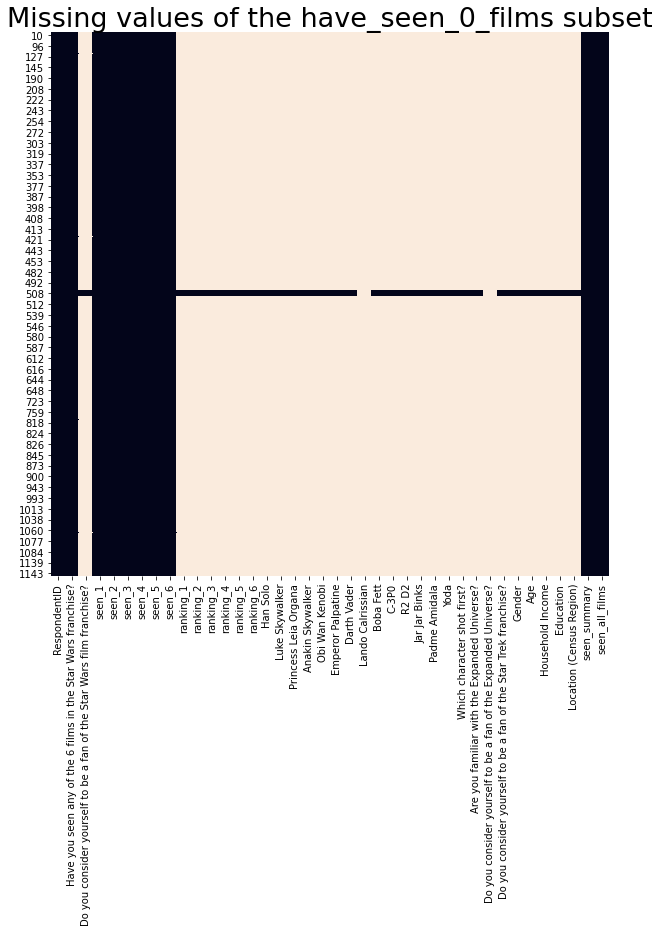

In [33]:
# Creating a dataset with only the respondents who have seen at least 
# some of the films, but 'seen_summary' is 0
have_seen_0_films = star_wars[(star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?']==True)
                              &
                              (star_wars['seen_summary']==0)
                       ]

# Plotting a heatmap of missing values for the have_seen_0_films subset
plot_heatmap(have_seen_0_films, 
             title='Missing values of the have_seen_0_films subset')

In [34]:
have_seen_0_films.isnull().sum()

RespondentID                                                               0
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    100
seen_1                                                                     0
seen_2                                                                     0
seen_3                                                                     0
seen_4                                                                     0
seen_5                                                                     0
seen_6                                                                     0
ranking_1                                                                100
ranking_2                                                                100
ranking_3                                                                100
ranking_4                                                                100

Hence, almost all the values in these rows are missing, all the `seen` columns are evidently False (despite these respondents have seen at least some of the films), and so the `'seen_summary'` column is 0. The only relatively "sane" row is the row \[508]\. We'll drop this row from the subset to keep only invalid rows, and then we'll use this subset as a boolean mask to remove all the invalid rows from the `star_wars` dataset.

In [35]:
# Dropping the row with non-invalid values
have_seen_0_films = have_seen_0_films.drop(index=508)
have_seen_0_films.shape

(100, 40)

In [36]:
# Removing all the invalid rows from the dataset
star_wars.drop(have_seen_0_films.index, inplace=True)
star_wars.reset_index(drop=True, inplace=True)
star_wars.shape

(1086, 40)

Let's double-check the missing values left in our subset.

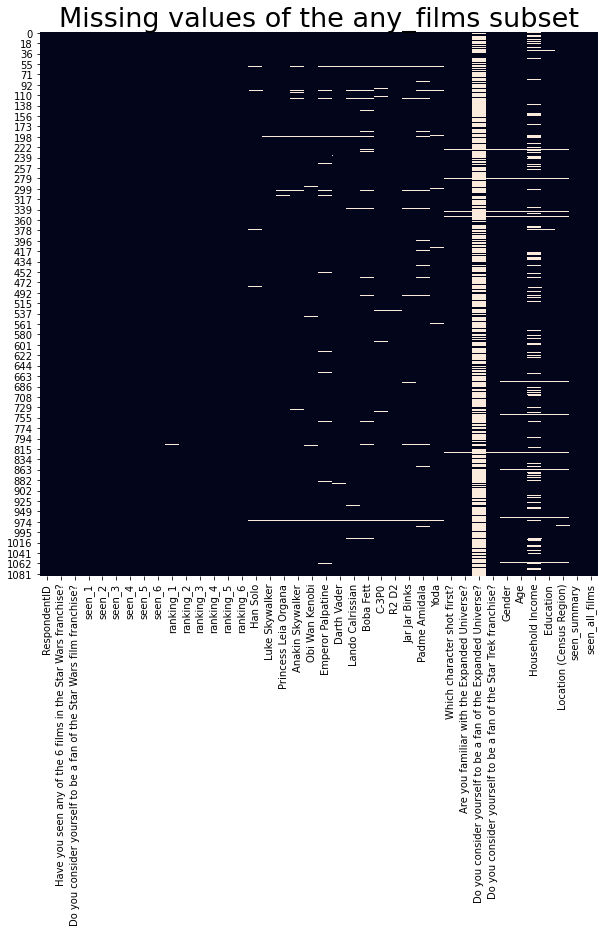

In [37]:
any_films = star_wars[star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?']==True
                              ]

# Plotting a heatmap of missing values for the any_films subset
plot_heatmap(any_films, title='Missing values of the any_films subset')

We see that the column `'Do you consider yourself to be a fan of the Expanded Universe?'` is almost empty, and it was also completely empty for the `no_films` subset. Besides, it doesn't represent any interest for our analysis, so we'll drop it. The column`'Household Income'` is also characterized by a high percentage of missing value (being a sensible question for people to answer). We'll leave this column, but keep in mind this issue.

In [38]:
# Deleting the almost empty column and resetting the index
del star_wars['Do you consider yourself to be a fan of the Expanded Universe?']
star_wars.reset_index(drop=True, inplace=True)
star_wars.shape

(1086, 39)

###  Creating Subsets
After successfully dealing with missing values, we can finally return to the degree of involvement and its categories, which we defined at the beginning of this chapter: the respondents who haven't seen any of the 6 films, who have seen some of them, and who have seen all of them. To start with, we'll create the corresponding subsets, as well as those for fans and non-fans, which we're going to use later in this project. Earlier, we have already created the `no_films` subset, but since afterwards we reset the index, let's do it again.

In [39]:
# Creating subsets for the degree of involvement groups
no_films = star_wars[star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'] == False]
some_films = star_wars[(star_wars[
    'Have you seen any of the 6 films in the Star Wars franchise?'] == True)
                       &
                       (star_wars['seen_all_films'] == False)
                       ]
all_films = star_wars[star_wars['seen_all_films'] == True]
non_fans = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
fans = star_wars[star_wars[
    'Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

Let's see the percentage of each group.

In [40]:
# Calculating the percentage of each involvement group
involvement_groups_list = ['no films', 'some films', 'all films']
fan_groups_list = ['non-fans', 'are fans']

involvement_groups = [no_films.shape[0], 
                      some_films.shape[0], 
                      all_films.shape[0]]
fan_groups = [non_fans.shape[0], 
              fans.shape[0]]

print('Degree of involvement groups:')
for i in range(len(involvement_groups)):
    print(involvement_groups_list[i] + '\t', 
          round(involvement_groups[i]*100/sum(involvement_groups)),'%')
print('\n')
print('Fan groups:')
for i in range(len(fan_groups)):
    print(fan_groups_list[i] + '\t', 
          round(fan_groups[i]*100/sum(fan_groups)),'%')

Degree of involvement groups:
no films	 23 %
some films	 34 %
all films	 43 %


Fan groups:
non-fans	 34 %
are fans	 66 %


We see that there are twice more fans than non-fans in our dataset. 43%  of all the respondents (obviously, we don't count anymore those ones who have seen some films but didn't properly compile the survey) have seen all the films, while 23% – none of them.

Let's check how many fans have seen all the movies and how many viewers who have seen all the movies are fans.

In [41]:
print('Fans:')
print(fans['seen_summary'].value_counts(
    normalize=True).mul(100).round(0).astype(str).str.replace('.0', '')+'%')
print('\n')
print('Have seen all films:')
print(all_films['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(
    normalize=True).mul(100).round(0).astype(str).str.replace('.0', '')+'%')

Fans:
6    74%
4     9%
3     7%
5     6%
2     3%
1     1%
Name: seen_summary, dtype: object


Have seen all films:
True     87%
False    13%
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object


Hence, 74% of the fans have seen all the movies and 87% of the viewers who have seen all the movies are fans. There is an evident strong correlation between being a fan and having seen all the films, but not an exact correspondence.
### Degree of Involvement by Gender, Age, Education, and Income
Let's for now focus on the 3 groups defined above: `no_films`,  `some_films`, and `all_films`. For them, we'll compare the percentage of each gender and age / income / education categories. Practically, as we saw earlier, we don't have a big choice of features to compare for the `no_films` subset. There is also the `'Location (Census Region)'` column, but it has too many categories to compare, so this comparison will not be enough illustrative:

In [42]:
star_wars['Location (Census Region)'].nunique()

9

To visualize the percentage of each category of gender, age, education, and income for the 3 groups, we'll use percentage stacked bar charts.

First, we have to create a dictionary for each factor in interest, where we'll gather the frequencies for each category. Then, we'll transform these frequencies into percentage and plot the results.

Since we'are going to repeat these 2 steps for each of the 4 factors, and also further in the project, we'll create the functions for them.

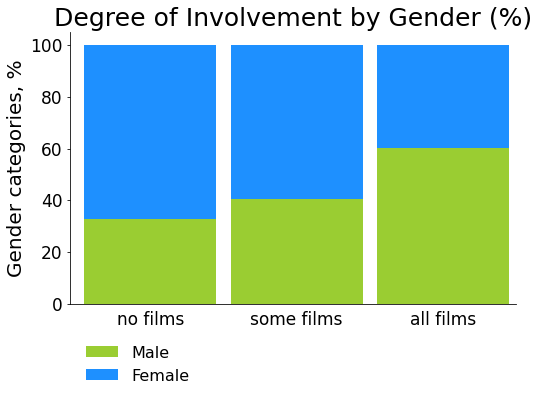

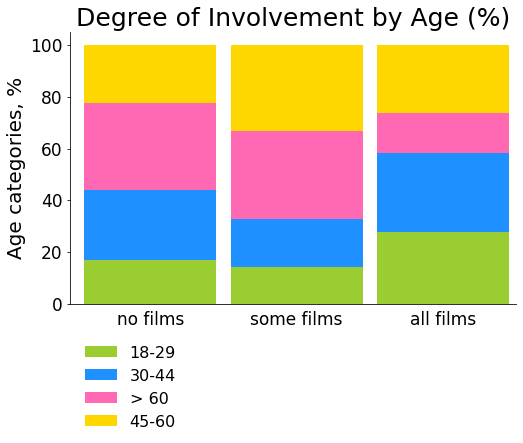

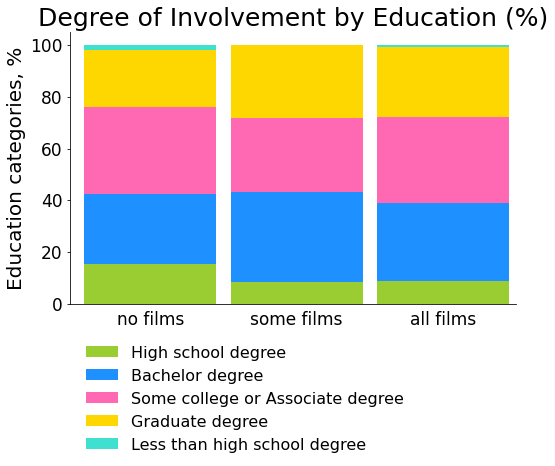

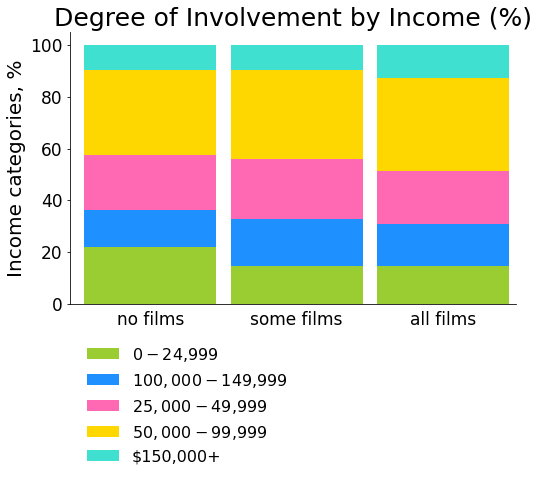

In [43]:
# Creating a list of dataframes (groups)
subsets = [no_films, some_films, all_films] 

# Creating a list of the corresponding xlabels
xlabels=['no films', 'some films', 'all films']

# Defining a function for creating a dictionary for each factor
def create_category_dictionary(column):
    
    # CREATING CATEGORIES
    categories = star_wars[column].unique().tolist()
    # Removing NaN values from the list
    categories = [x for x in categories if pd.notnull(x)]  
    
    # COUNTING CATEGORIES    
    category_counter = []
    for category in categories:
        subset_counter = []
        for subset in subsets:
            # Finding a frequency of given category for each group
            # and appending it to the list
            subset_counter.append(len(subset[subset[column] == category])) 
        # Appending the list of category frequencies for each group 
        # to the list of lists  
        category_counter.append(subset_counter)
      
    # CREATING CATEGORY DICTIONARY
    data = {}
    for i in range(len(categories)):
        data[categories[i]] = category_counter[i]
    return data


# Defiing a function for creating stacked bar plots
def plot_stacked_bar(data, figsize, title, ylabel, 
                     xlim_end, legend_position):    
    plotdata = pd.DataFrame(data, index=xlabels)
    
    # Calculating %   
    stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)  
    colors = ('yellowgreen', 'dodgerblue', 'hotpink', 'gold', 'turquoise')
    ax = stacked_data.plot(kind='bar',
                           stacked=True,
                           figsize=figsize,
                           color=colors,
                           width=0.9,
                           rot=0)
    ax.set_title(title, fontsize=25)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlim(-0.55,xlim_end)
    ax.set_xticklabels(plotdata.index.to_list(), fontsize=17)
    ax.tick_params(bottom = False, labelsize=17)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(fontsize=16, bbox_to_anchor=legend_position, frameon=False)
    plt.show()
    return ''
    
    
# Extracting and visualizing data for genders   
genders = create_category_dictionary(column='Gender')
print(plot_stacked_bar(data=genders,
                       figsize=(8,5),
                       title='Degree of Involvement by Gender (%)', 
                       ylabel='Gender categories, %',
                       xlim_end=2.5,
                       legend_position=(0.3, -0.1)))

# Extracting and visualizing data for age categories 
ages = create_category_dictionary(column='Age')
print(plot_stacked_bar(data=ages,
                       figsize=(8,5),
                       title='Degree of Involvement by Age (%)',
                       ylabel='Age categories, %',                       
                       xlim_end=2.5,
                       legend_position=(0.27, -0.1)))

# Extracting and visualizing data for education categories 
educations = create_category_dictionary(column='Education')
print(plot_stacked_bar(data=educations,
                       figsize=(8,5),
                       title='Degree of Involvement by Education (%)', 
                       ylabel='Education categories, %',
                       xlim_end=2.5,
                       legend_position=(0.78, -0.1)))

# Extracting and visualizing data for income categories
incomes = create_category_dictionary(column='Household Income')
print(plot_stacked_bar(data=incomes,
                       figsize=(8,5),
                       title='Degree of Involvement by Income (%)',
                       ylabel='Income categories, %',
                       xlim_end=2.5,
                       legend_position=(0.52, -0.1)))

From these plots, we can make some observations:

- Men showed more interest to Star Wars than women (60% of those who have seen all the films are men, while 70% of those who haven't seen any are women). It was expectable: these movies look more male-style.
- The respondents of the age category of 30-44, and especially those of 18-29, seem to be more interested in watching Star Wars. The percentage of these categories increases among the `'all_films'` group. 
- At the same time, the percentage of people older than 60 noticeably decreases among the `'all_films'` group, while yet among the `'some_films'` group it's rather high. This looks curious: when the original trilogy was released in 1977, people from this category were 23+ y.o. (we remember that our dataset was created in 2014). It looks like when the second trilogy appeared, at the beginning they were probably curious to see it, but then lost interest, perhaps comparing the new movies with the original ones.
- In general, the percentages of each education category for all groups don't show significant variations. However, there is one feature to notice: a very small overall percentage of the respondents who don't have high school degree. The presence of this category is surprising, because, first, the minimum age of respondents is 18, and in the U.S. students graduate high school exactly at this age, and, second, the dataset was created on July 2014, while the graduation typically takes place on May-June. Most probably, there was a delay between the survey itself and the dataset compilation; in this case, these students are exactly those who graduated in 2014. Anyway, this very small education category is mostly related to those people who haven't seen any of the Star Wars movies. It can be explained by the fact that the last film (by June 2014) was produced in 2005, when these people were 8 y.o., so they were not really the target audience of Star Wars.
- There aren't any particular insights for the income factor.

Now that we have analyzed any potentially valuable information about the respondents who haven't seen any of the Star Wars films, we can drop these rows and reset the index.

In [44]:
# Dropping no_films rows and resetting the index
star_wars.drop(no_films.index, inplace=True)
star_wars.reset_index(drop=True, inplace=True)
star_wars.shape

(836, 39)

## Explorig the Data: Fans vs. Non-Fans
### Fans vs. Non-Fans by Different Factors
Previously, we found out that being a fan is strongly correlated with having seen al the films, which looks logical. However, let's have a look separately at the groups of fans and non-fans, probably we'll discover some new insights about them. We'll start by comparing the same factors as above: gender, age,  education, and income. Also, we'll see once again, now in a graphical form, how many people from both groups have seen all the films.

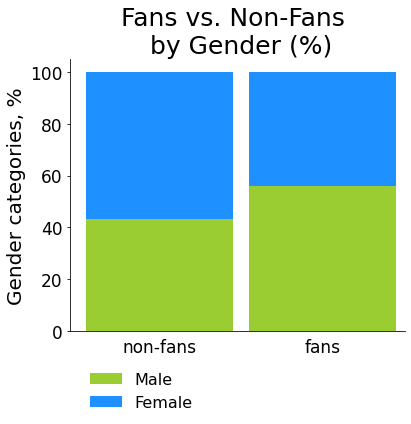

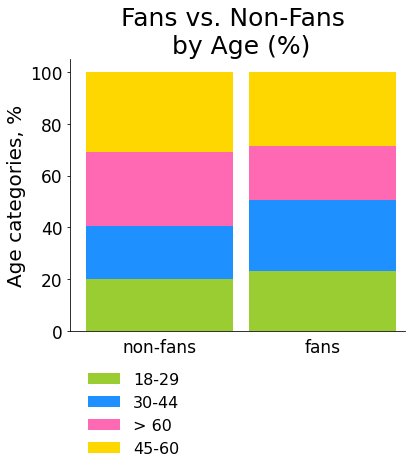

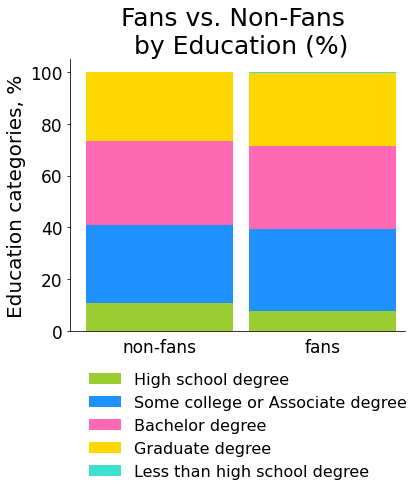

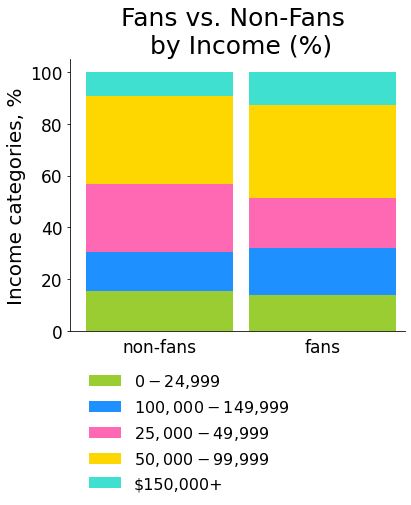

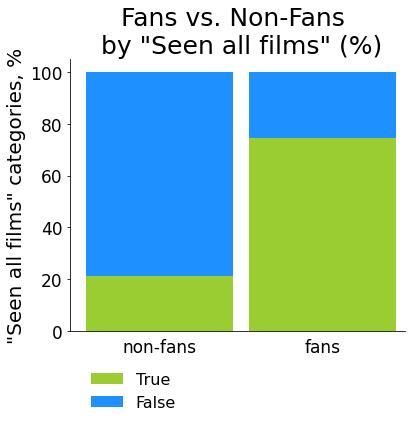

In [45]:
# Creating a list of dataframes (groups)
subsets = [non_fans, fans] 

# Creating a list of the corresponding xlabels
xlabels=['non-fans', 'fans']
  
# Extracting and visualizing data for genders   
genders = create_category_dictionary(column='Gender')
print(plot_stacked_bar(data=genders,
                       figsize=(6,5),
                       title='Fans vs. Non-Fans \n by Gender (%)', 
                       ylabel='Gender categories, %',
                       xlim_end=1.5,
                       legend_position=(0.41, -0.1)))

# Extracting and visualizing data for age categories 
ages = create_category_dictionary(column='Age')
print(plot_stacked_bar(data=ages,
                       figsize=(6,5),
                       title='Fans vs. Non-Fans \n by Age (%)',
                       ylabel='Age categories, %',
                       xlim_end=1.5,
                       legend_position=(0.37, -0.1)))

# Extracting and visualizing data for education categories 
educations = create_category_dictionary(column='Education')
print(plot_stacked_bar(data=educations,
                       figsize=(6,5),
                       title='Fans vs. Non-Fans \n by Education (%)', 
                       ylabel='Education categories, %',
                       xlim_end=1.5,
                       legend_position=(1.05, -0.1)))

# Extracting and visualizing data for income categories
incomes = create_category_dictionary(column='Household Income')
print(plot_stacked_bar(data=incomes,
                       figsize=(6,5),
                       title='Fans vs. Non-Fans \n by Income (%)',
                       ylabel='Income categories, %',
                       xlim_end=1.5,
                       legend_position=(0.7, -0.1)))

# Extracting and visualizing data for 'seen_all_films' categories
seen_all_films = create_category_dictionary(column='seen_all_films')
print(plot_stacked_bar(data=seen_all_films,
                       figsize=(6,5),
                       title='Fans vs. Non-Fans \n by "Seen all films" (%)',
                       ylabel='"Seen all films" categories, %',
                       xlim_end=1.5,
                       legend_position=(0.36, -0.1)))

Some of our observations here partially reflect those we made for the degree of involvement groups:

- There are more fans of Star Wars among men than women, but the gap is not significant, around 7%.
- The respondents who are 30-44 y.o. tend to be fans, while those older than 60 are mostly non-fans.
- Those very few respondents who graduated exactly in 2014 and who have seen at least some of the films are all fans.
- People with the income from 50,000$ tend to be fans.
- There are much more people who have seen all the films among fans (74%) than among non-fans (around 21%).

### Star Wars vs. Star Trek
[Star Trek](https://en.wikipedia.org/wiki/Star_Trek) is a highly popular worldwide American media franchise originating from the 1960s science fiction television series that became a cult phenomenon for decades. It's a main rival of the Star Wars franchise in the science fiction genre, with many fans and scholars.

We're going to find out if the fans of Star Wars tend to be also the fans of Star Trek, or they remain loyal to their franchise.

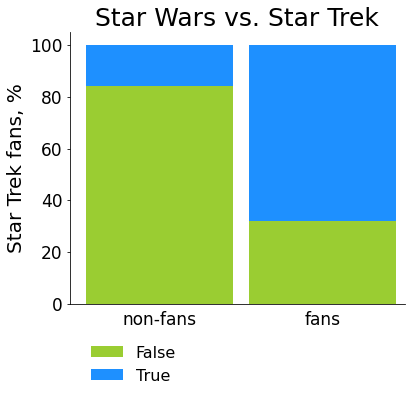

In [46]:
# Extracting and visualizing data for the Star Trek fans
seen_all_films = create_category_dictionary(column='Do you consider yourself to be a fan of the Star Trek franchise?')
print(plot_stacked_bar(data=seen_all_films,
                       figsize=(6,5),
                       title='Star Wars vs. Star Trek',
                       ylabel='Star Trek fans, %',
                       xlim_end=1.5,
                       legend_position=(0.36, -0.1)))

Hence, the fans of Star Wars tend to be also fans of Star Trek, while those who aren't fans of the first aren't either particularly enthusiastic about the second. It seems that this high percentage of the Star Wars + Star Trek fans is related to people who are interested in the science fiction genre as such.
### Star Wars vs. the Expanded Universe

Star Wars has been expanded to media other than the original films, such as books and video games. These derivative works have been produced concurrently with, between, and after the Star Wars trilogies and television series. Almost all non-film material produced prior to April 2014 was collectively known as the [**Star Wars Expanded Universe**](https://en.wikipedia.org/wiki/Star_Wars_expanded_to_other_media), rebranded later as Star Wars Legends and declared non-canonical to the franchise.

One of the questions of the survey was: **"Are you familiar with the Expanded Universe?"**. Let's see first how many respondents who have seen at least some of the films are familiar with it.

In [47]:
star_wars['Are you familiar with the Expanded Universe?'].value_counts(
    normalize=True).mul(100).round(0).astype(str).str.replace('.0', '')+'%'

False    74%
True     26%
Name: Are you familiar with the Expanded Universe?, dtype: object

Having only 26% of the respondents being familiar with the Expanded Universe, we can conclude that in general it isn't very popular among Star Wars viewers. However, let's now compare fans and non-fans.

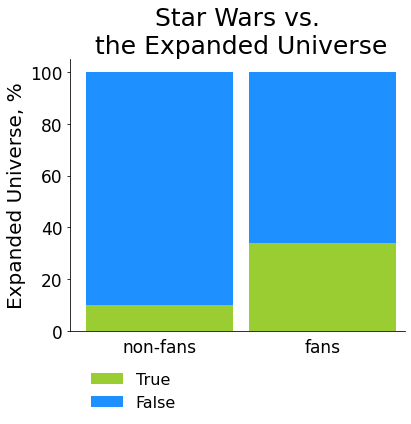

In [48]:
# Extracting and visualizing data for the Expanded Universe categories
seen_all_films = create_category_dictionary(column='Are you familiar with the Expanded Universe?')
print(plot_stacked_bar(data=seen_all_films,
                       figsize=(6,5),
                       title='Star Wars vs.\n the Expanded Universe',
                       ylabel='Expanded Universe, %',
                       xlim_end=1.5,
                       legend_position=(0.36, -0.1)))

Unsurprisingly, among fans there are more people familiar with the Expanded Universe (30%) than among the others (10%).
### Which character shot first?
From this [Wikipedia page](https://en.wikipedia.org/wiki/Han_shot_first) we know that this question of the survey refers to a controversial change made to a scene in Star Wars (1977), in which Han Solo is confronted by the bounty hunter Greedo in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead. Later versions are edited so that Greedo attempts to fire at Han first. The reason for this alteration was to give Solo more justification for acting in self-defense. There were also many other changes made in the 1997 Special Edition of Star Wars, but this one is the most discussed and criticised by many fans and commentators who argued that it weakens initially morally ambiguous Solo's character, making his later transition from anti-hero to hero less meaningful.

First, we'll check which options to select were in this question.

In [49]:
star_wars['Which character shot first?'].unique()

array(["I don't understand this question", 'Greedo', 'Han', nan],
      dtype=object)

Evidently, some of the respondents don't know the story behind this question.

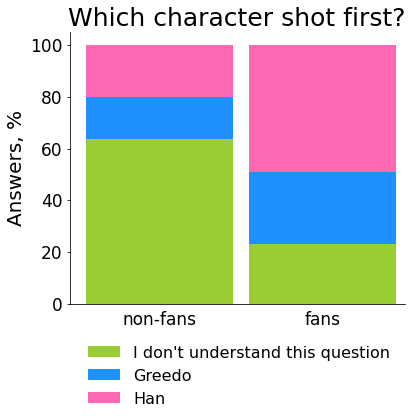

In [50]:
# Extracting and visualizing data for the answers on the question
seen_all_films = create_category_dictionary(column='Which character shot first?')
print(plot_stacked_bar(data=seen_all_films,
                       figsize=(6,5),
                       title='Which character shot first?',
                       ylabel='Answers, %',
                       xlim_end=1.5,
                       legend_position=(1, -0.1)))

We see that the fans are much more informed about this topic: only around 22% of them don't know the story behind this question, while almost 50% gave a correct answer. As for the other viewers, around 65% of them don't understand the question, while from the rest of the non-fans only half answered correctly.
### Finding the Highest-Ranked Movie:  Fans vs. Non-Fans
Earlier in this project, we have analyzed the data from the standpoint of the highest-ranked movie, both overall and by gender. Now, we'll repeat the same analysis for fans and non-fans separately.

In [51]:
# Selecting only the ranking columns for fans and non-fans separately
fans_rankings = fans[star_wars.columns[9:15]]
non_fans_rankings = non_fans[star_wars.columns[9:15]]

# Calculating the mean ranking for each movie for fans and non-fans
fans_rankings_mean = fans_rankings.mean().reset_index()
non_fans_rankings_mean = non_fans_rankings.mean().reset_index()

print(fans_rankings_mean)
print('\n')
print(non_fans_rankings_mean)

       index         0
0  ranking_1  4.141304
1  ranking_2  4.342391
2  ranking_3  4.417423
3  ranking_4  2.932971
4  ranking_5  2.333333
5  ranking_6  2.829710


       index         0
0  ranking_1  2.936396
1  ranking_2  3.591549
2  ranking_3  4.193662
3  ranking_4  3.933099
4  ranking_5  2.862676
5  ranking_6  3.471831


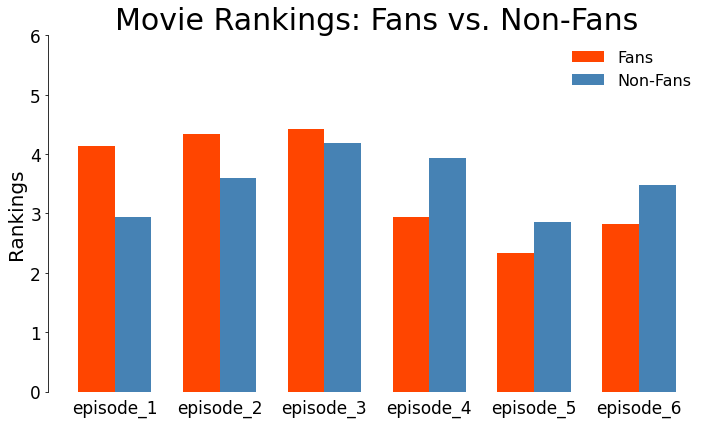

In [52]:
# Renaming fan rankings to the corresponding episodes 
# and the 0 column to 'rankings'
rename_labels_column_name(df=fans_rankings_mean, 
                          old_labels='ranking',
                          column_name='rankings')

# Renaming non-fan rankings to the corresponding episodes 
# and the 0 column to 'rankings'
rename_labels_column_name(df=non_fans_rankings_mean, 
                          old_labels='ranking',
                          column_name='rankings')

  
# Plotting a grouped bar chart for the rankings from fans and non-fans
plot_grouped_bar(df1=fans_rankings_mean,
                 df2=non_fans_rankings_mean,
                 column='rankings', 
                 label1='Fans',
                 label2='Non-Fans',
                 color1='orangered',
                 color2='steelblue',
                 title='Movie Rankings: Fans vs. Non-Fans', 
                 ylabel='Rankings',
                 ylim_end=6)

Like it was for the two previous plots of rankings (the overall and by gender), the Episode V is the highest-ranked one among both fans and non-fans. A general trend is also the same: the original trilogy is ranked higher than the second one, with a steady lowering of the rankings for each subsequent movie. 

The movies of the original trilogy was estimated higher by fans, while those of the prequel one – by non-fans. By the most recent movie (Episode III) the rankings for both fans and non-fans were almost levelled off, and reached the minimum for both groups.

In general, the difference between the rankings of the original trilogy vs. the prequel trilogy is especially noticeable for fans. It seems that they are more "nostalgic" about the original films.
### Finding the Most Viewed Movie: Fans vs. Non-Fans
Next, we're going to find the most viewed movie by fans and non-fans.

In [53]:
# Selecting only the 'seen' columns for fans and non-fans separately
fans_seen = fans[star_wars.columns[3:9]]
non_fans_seen = non_fans[star_wars.columns[3:9]]

# Calculating the number of viewers for each movie for fans and non-fans, 
# and sorting in descending order
fans_seen_sum = fans_seen.sum().sort_values(ascending=False).reset_index()
non_fans_seen_sum = non_fans_seen.sum().sort_values(ascending=False).reset_index()

print(fans_seen_sum)
print('\n')
print(non_fans_seen_sum)

    index    0
0  seen_5  538
1  seen_6  537
2  seen_1  500
3  seen_4  483
4  seen_2  463
5  seen_3  450


    index    0
0  seen_5  220
1  seen_6  201
2  seen_1  173
3  seen_4  124
4  seen_2  108
5  seen_3  100


Like it was for the overall plot and by gender, after sorting the numbers of viewers of each movie, we obtained the same succession of movies: Episode V – VI – I – IV – II – III. Let's confirm it.

In [54]:
# Comparing the sorted successions for the numbers of male and female viewers
compare_successions(fans_seen_sum, non_fans_seen_sum)

True

Having confirmed that the sorted movie successions are equal also in this case, we can use them for plotting.

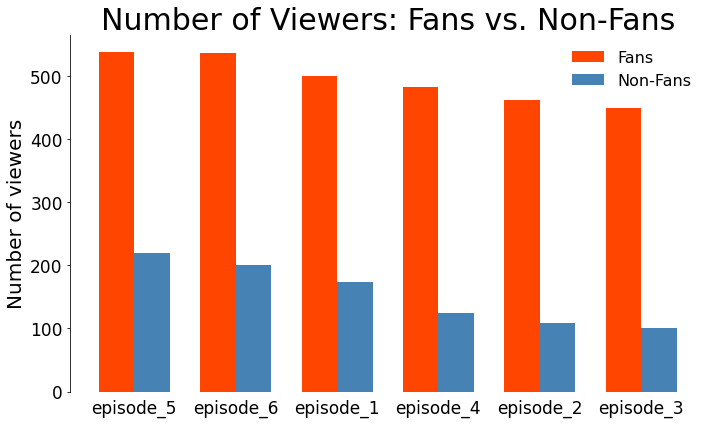

In [55]:
# Renaming numbers of fan viewers to the corresponding episodes 
# and the 0 column to 'seen'
rename_labels_column_name(df=fans_seen_sum, 
                          old_labels='seen',
                          column_name='viewers')

# Renaming numbers of non-fans viewers to the corresponding episodes  
# and the 0 column to 'seen'
rename_labels_column_name(df=non_fans_seen_sum, 
                          old_labels='seen',
                          column_name='viewers')

# Plotting a grouped bar chart for the numbers of fan and non-fan viewers
plot_grouped_bar(df1=fans_seen_sum,
                 df2=non_fans_seen_sum,
                 column='viewers', 
                 label1='Fans',
                 label2='Non-Fans',
                 color1='orangered',
                 color2='steelblue',
                 title='Number of Viewers: Fans vs. Non-Fans', 
                 ylabel='Number of viewers',
                 ylim_end=None)

A general trend here reflects the ones for both all the viewers and by gender, and, overall, the one of rankings: Episode V is the most viewed by both fans and non-fans, the movies of the original trilogy were watched by more people than the ones of the prequel trilogy. 

There is also another evident tendency: each film was watched by far greater number of fans than non-fans. It can be easily explained by our observation from one of the previous plots: a much higher percentage of fans watched all the films, with respect to non-fans.
## Exploring the Characters of Star Wars
### Finding the Most and the Least Familiar Characters
When we were cleaning and mapping radio-button columns, we noticed that apart from being able to select if a certain character is their favorite or not (and to what degree), the respondents could also select that they were unfamiliar with it. Let's focus now exactly on that "unknown" characters.

In [56]:
# Selecting all the radio-button columns
unfamiliar = star_wars.iloc[:, 15:29]

# Creating a dictionary and mapping only unfamiliar characters
unfamiliar_dict = {'Unfamiliar (N/A)': 1}

for column in unfamiliar.columns:
    unfamiliar[column] = unfamiliar[column].map(unfamiliar_dict)
    
# Counting for each character the number of people for whom it's unfamiliar
unfamiliar_sum = unfamiliar.sum().sort_values(ascending=False).reset_index()

# Renaming the 0 column
unfamiliar_sum.rename(columns={0: 'viewers'}, inplace=True) 

# Resetting the index
unfamiliar_sum = unfamiliar_sum.set_index('index', drop=True) 
unfamiliar_sum

,viewers
index,
Padme Amidala,164.0
Emperor Palpatine,156.0
Lando Calrissian,148.0
Boba Fett,132.0
Jar Jar Binks,109.0
Anakin Skywalker,52.0
Obi Wan Kenobi,17.0
C-3P0,15.0
Han Solo,15.0


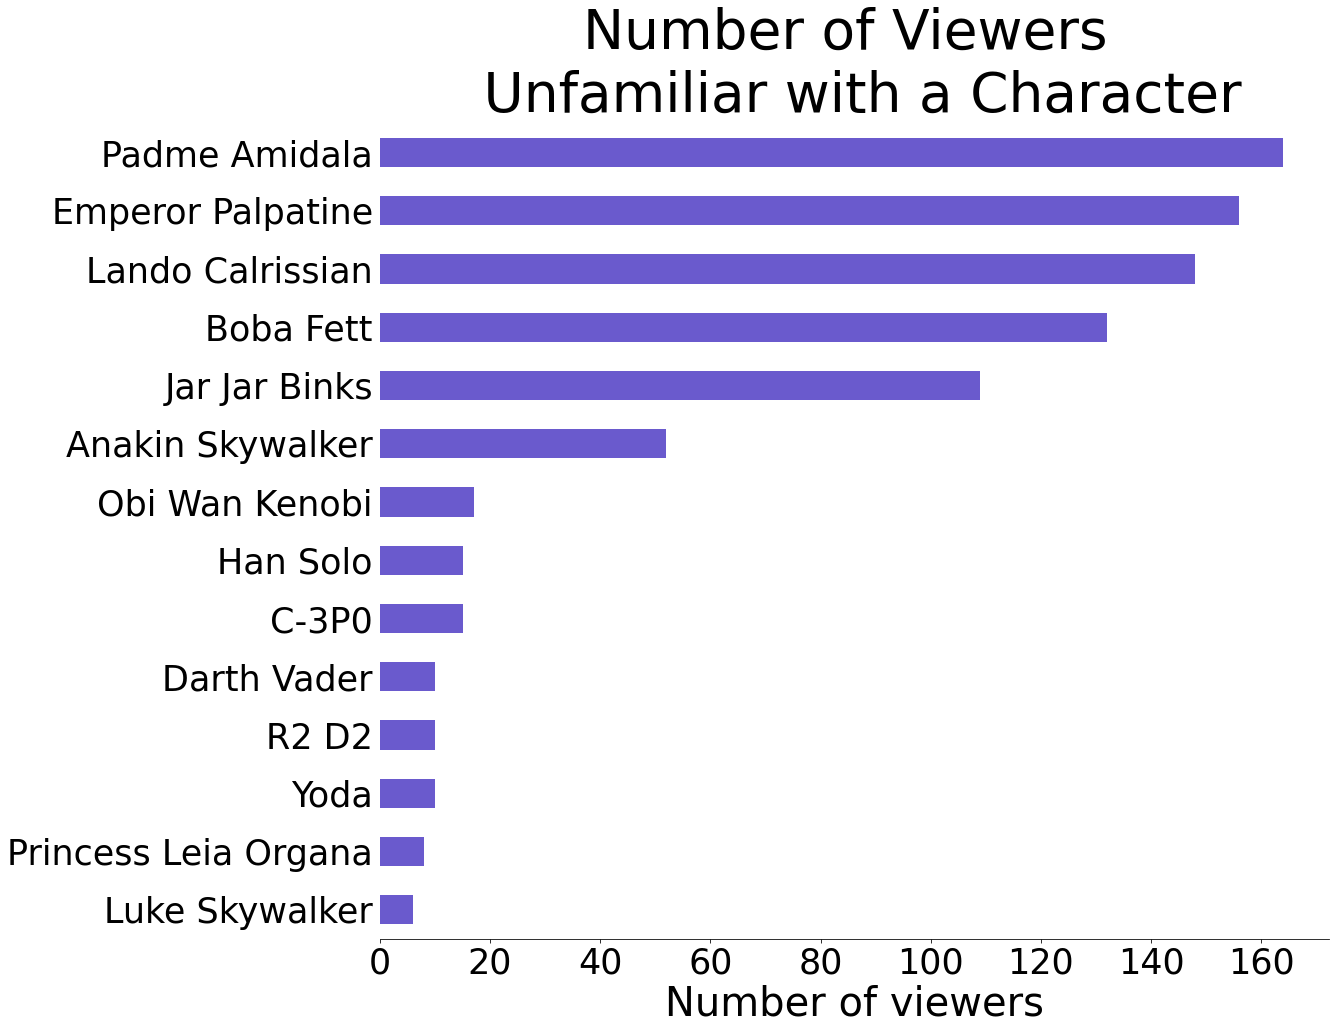

In [57]:
# Defining a function for creating horizontal bar plots
def plot_horizontal_bar(df, column, title, xlabel, xlim_end):
    fig, ax = plt.subplots(figsize=(17,15))
    df[column].sort_values().plot.barh(color='slateblue',
                                       xlim=(0, xlim_end),
                                       rot=0)
    ax.set_title(title, fontsize=55)
    ax.set_ylabel(None)
    ax.set_xlabel(xlabel, fontsize=40)
    ax.tick_params(axis='both', labelsize=35, left = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.show()
    
# Plotting the characters by the number of people unfamiliar with each of them
plot_horizontal_bar(df=unfamiliar_sum, 
                    column='viewers',
                    title='Number of Viewers \n Unfamiliar with a Character',
                    xlabel='Number of viewers',
                    xlim_end=None)

Hence, the **least familiar** character for the viewers is [**Padme Amidala** ](https://en.wikipedia.org/wiki/Padmé_Amidala)(unfamiliar to almost 20% of the respondents), followed by [Emperor Palpatine](https://en.wikipedia.org/wiki/Palpatine) (19%) and [Lando Calrissian](https://en.wikipedia.org/wiki/Lando_Calrissian)(18%).

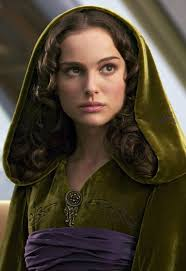
<div align="center"><font size="4"><strong>Padme Amidala</strong></font></div>

The **most familiar** character is [**Luke Skywalker**](https://en.wikipedia.org/wiki/Luke_Skywalker) (unfamiliar to only 0.7% of the respondents), followed by [Princess Leia Organa](https://en.wikipedia.org/wiki/Princess_Leia) (0.95%), [Yoda](https://en.wikipedia.org/wiki/Yoda) (1%), [R2-D2](https://en.wikipedia.org/wiki/R2-D2) (1%), and [Darth Vader](https://en.wikipedia.org/wiki/Darth_Vader) (1%).

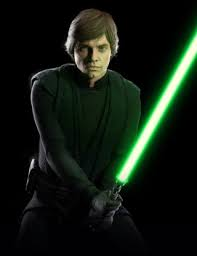
<div align="center"><font size="4"><strong>Luke Skywalker</strong></font></div>

### Finding the Most and the Least Favorite Characters
Now, we'll investigate which character is the most favorite for the majority of viewers and which one is the least favorite. 

While mapping the radio-button columns, we have rendered all the values to numbers, representing character rankings from 1 (very favorite) to 5 (very unfavorite). We're going to use these rankings for our further analysis.

                      rankings
index                         
Han Solo              1.328010
Luke Skywalker        1.419394
Princess Leia Organa  1.444714
Anakin Skywalker      2.224384
Obi Wan Kenobi        1.367574
Emperor Palpatine     2.928571
Darth Vader           2.520833
Lando Calrissian      2.363095
Boba Fett             2.642647
C-3P0                 1.596059
R2 D2                 1.430488
Jar Jar Binks         3.219101
Padme Amidala         2.395385
Yoda                  1.370098


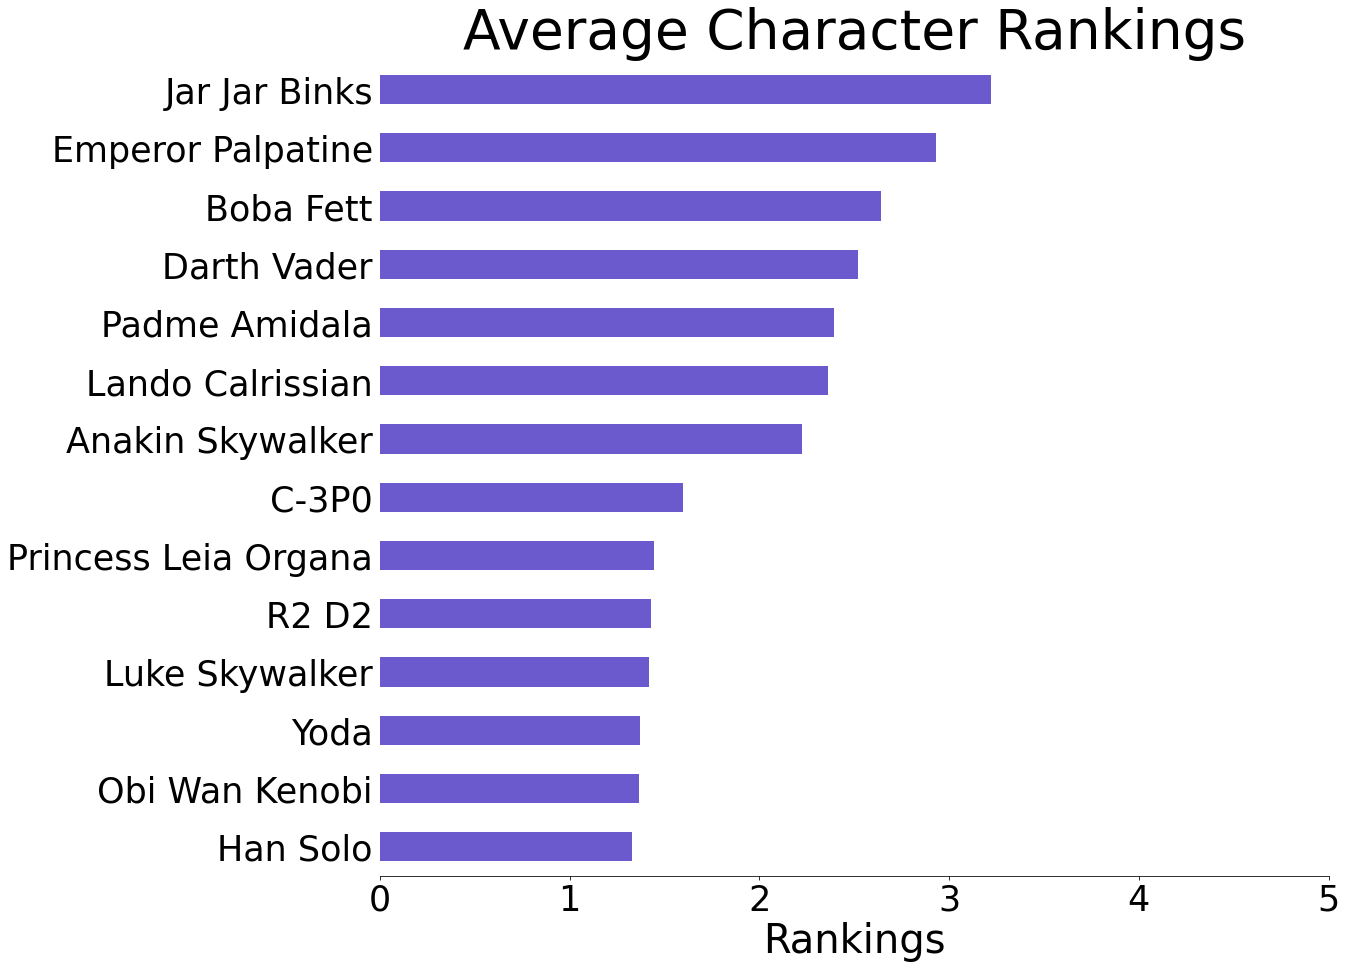

In [58]:
# Selecting all the radio-button columns
favorite = star_wars.iloc[:, 15:29]
favorite.head()

# Creating a dictionary for mapping unfamiliar characters
favorite_dict = {'Unfamiliar (N/A)': np.nan}

# Creating a list of column names
columns=[]

# Mapping only unfamiliar characters into NaN
for column in favorite.columns:
    favorite[column] = favorite[column].replace(favorite_dict)
    columns.append(column)
    
# Calculating the mean rankings
mean_favorite = favorite.mean().reset_index()

# Renaming the 0 column
mean_favorite.rename(columns={0: 'rankings'}, inplace=True) 

# Resetting the index
mean_favorite = mean_favorite.set_index('index', drop=True) 
print(mean_favorite)

# Plotting the character rankings
plot_horizontal_bar(df=mean_favorite, 
                    column='rankings',
                    title='Average Character Rankings',
                    xlabel='Rankings',
                    xlim_end=5)

According to the mean rankings, the **most favorite** character is [**Han Solo**](https://en.wikipedia.org/wiki/Han_Solo), followed with insignifiant gaps by [Obi Wan Kenobi](https://en.wikipedia.org/wiki/Obi-Wan_Kenobi), Yoda, Luke Skywalker, R2-D2, Princess Leia Organa, and [C-3P0](https://en.wikipedia.org/wiki/C-3PO).

![Han Solo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQYmPnwbdbu3fpHnUKzpWeMuF7bg0ZuvL7AVg&usqp=CAU)
<div align="center"><font size="4"><strong>Han Solo</strong></font></div>

The **least favorite** character is [**Jar Jar Binks**](https://en.wikipedia.org/wiki/Jar_Jar_Binks), followed by Emperor Palpatine, and [Boba Fett](https://en.wikipedia.org/wiki/Boba_Fett)

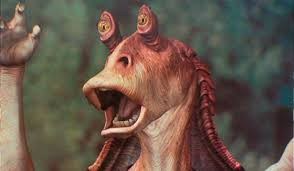
<div align="center"><font size="4"><strong>Jar Jar Binks</strong></font></div>

Let's dive a bit deeper and see the distributions of rankings, not only the mean value for each character.

In [59]:
# Reshaping the dataframe
melt = pd.melt(favorite, value_vars=columns)
melt.head()

,variable,value
0,Han Solo,1.0
1,Han Solo,2.0
2,Han Solo,1.0
3,Han Solo,1.0
4,Han Solo,1.0


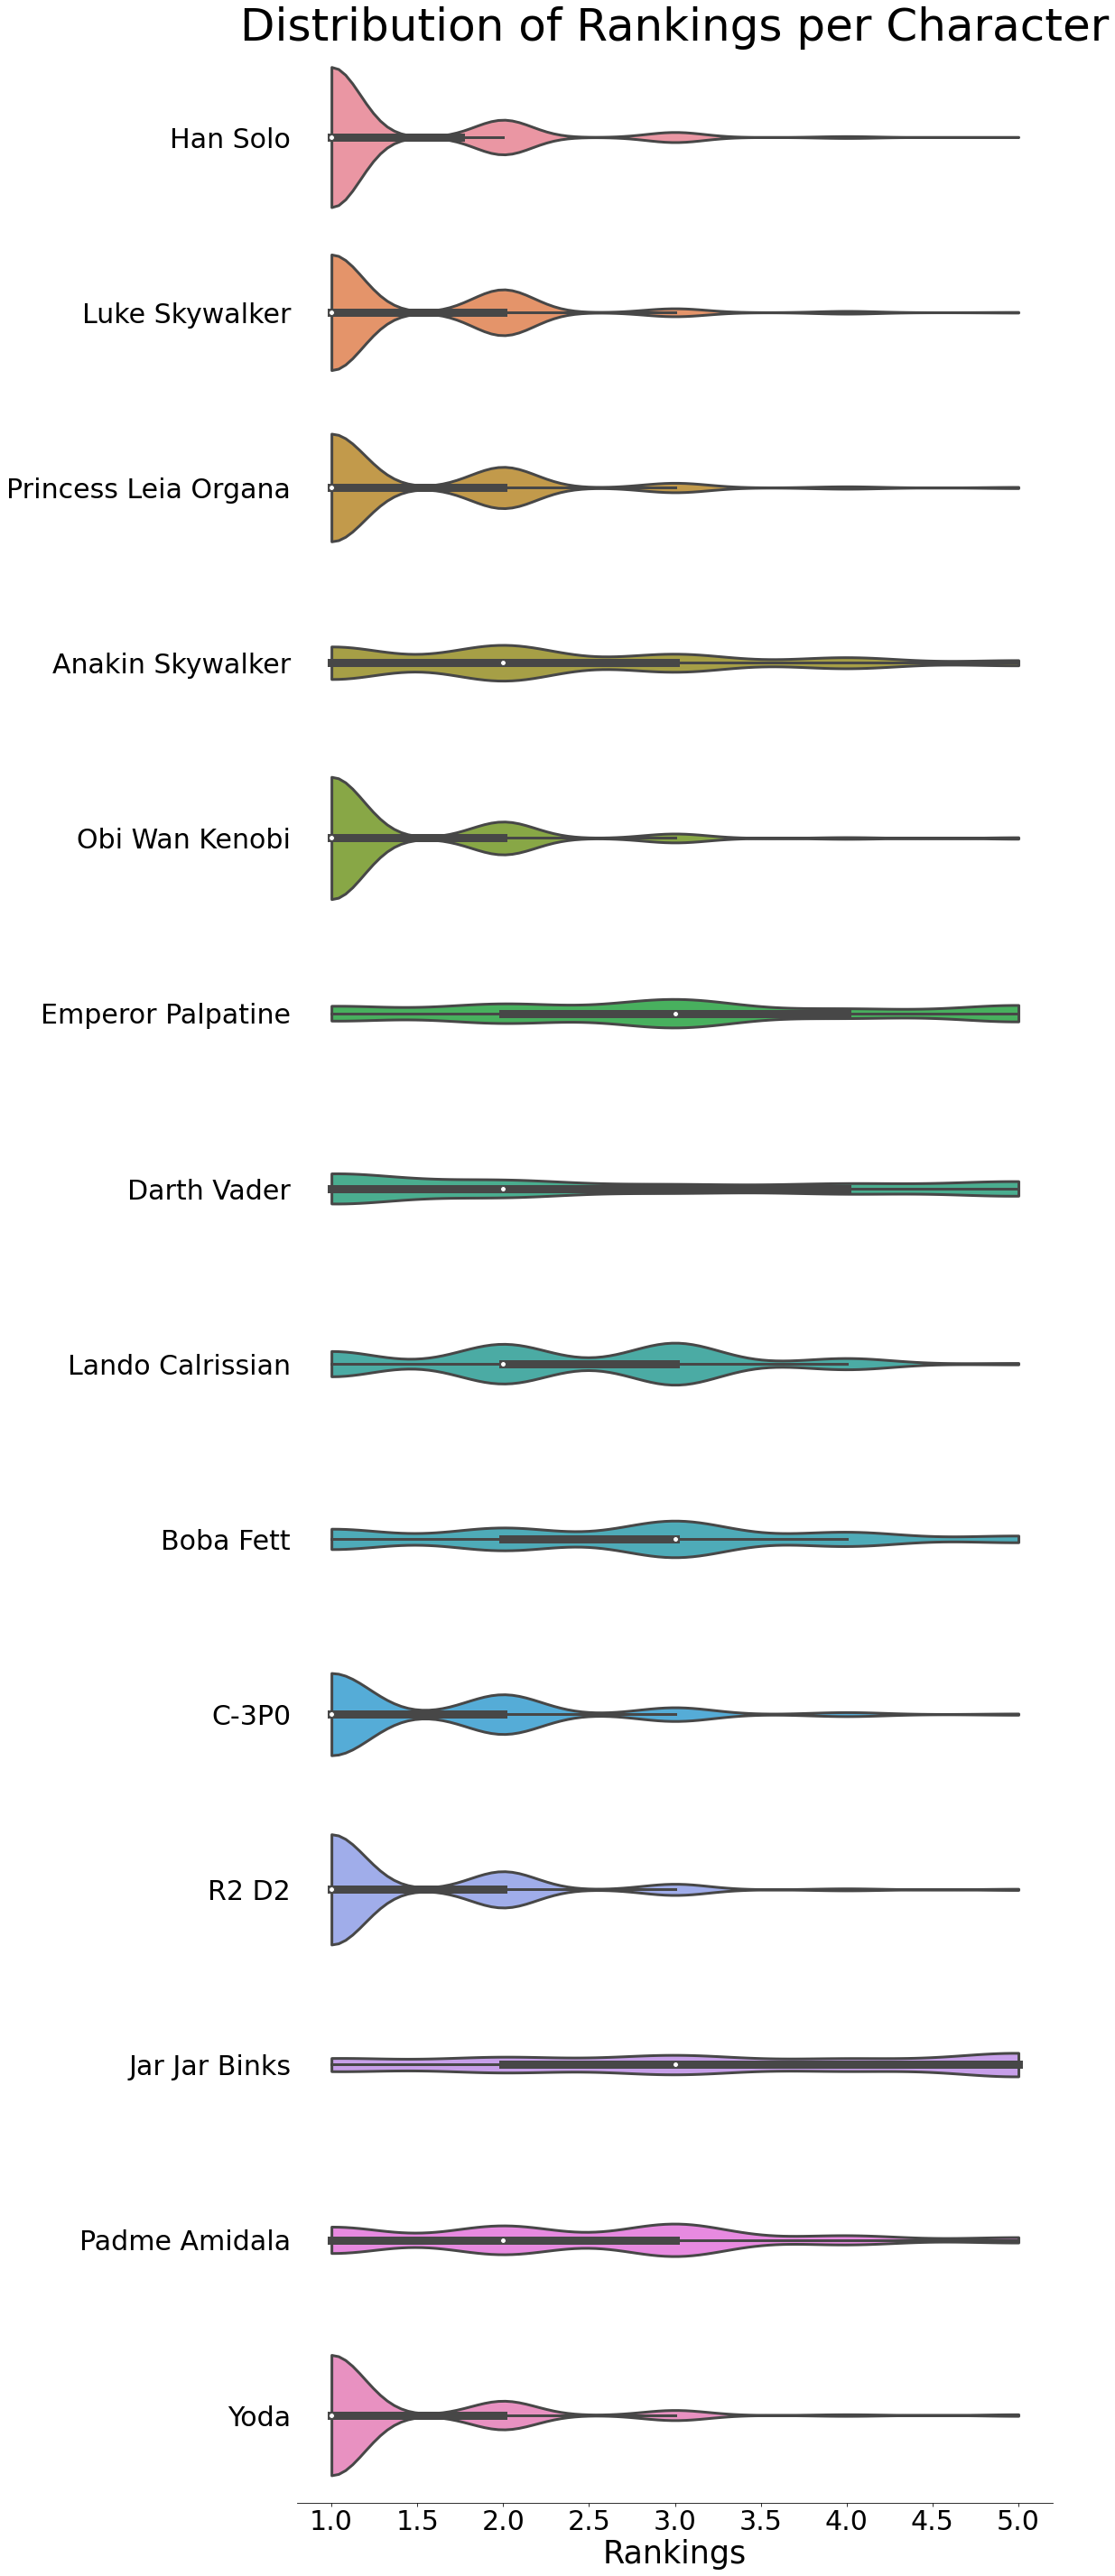

In [60]:
# Creating horizontal violin plots in a truncated form
# (to extend it only to the min and max values of the dataset)
categories = melt['variable']
values = melt['value']
fig, ax = plt.subplots(figsize=(15, 50))
sns.violinplot(y=categories, x=values, linewidth=3, cut=0)
ax.set_title('Distribution of Rankings per Character', fontsize=50)
ax.set_ylabel(None)  
ax.set_xlabel('Rankings', fontsize=35)
ax.tick_params(axis='both', labelsize=30, left = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

Our observations here:

- Han Solo, Obi Wan Kenobi, Yoda, Luke Skywalker, R2-D2, Princess Leia Organa, and C-3P0 are indeed mostly favorite characters, with the majority of respondents marked that they view them very favorably. 
- [Anakin Skywalker](https://starwars.fandom.com/wiki/Anakin_Skywalker) (who, after turning to the dark side, became known as Darth Vader), Padme Amidala, and Lando Calrissian are mostly viewed somewhat favorably to neutrally.
- Boba Fett is considered mostly neutral to favorite.
- Jar Jar Binks, who was the least favorite character by its mean ranking, in reality shows quite evenly distributed rankings from 1 to 5, with the median being equal to a neutral ranking, and with negative rankings indeed dominating, but not as significantly as we could expect.
- Emperor Palpatine, being almost equally split between likes and dislikes, and the median being equal to a neutral ranking, seems to be the **most controversial** character.

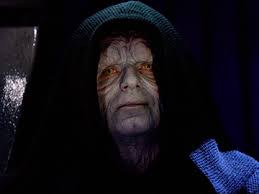
<div align="center"><font size="4"><strong>Emperor Palpatine</strong></font></div>

- Darth Vader looks the **most non-indifferent** character: the viewers viewed it favorably (mostly) or unfavorably, and only few are indifferent to it.

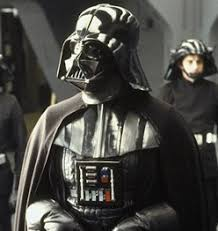
<div align="center"><font size="4"><strong>Darth Vader</strong></font></div>

## Conclusion
To sum up, in this project we have cleaned and explored a dataset of the Star Wars survey, published on July 2014. Below are the main findings from our analysis.
-	Answering the main question that we stated in the introduction of the project: **"Star Wars: Episode V The Empire Strikes Back" is indeed the highest-ranked and the most viewed of all, both overall and by each investigated category of people: men and women, fans and non-fans**. 
-	A general trend is that the films of the original trilogy have higher rankings and have been viewed by more people than the ones of the prequel trilogy. Starting already from Episode V, the rankings are steadily lowering for each subsequent movie, which reflects the tendency of the audience to become "saturated" with Star Wars and nostalgic about the original films. Interesting that the movies of the original trilogy were estimated higher by fans than non-fans, while those of the prequel one – vice versa.
-	Men showed more interest to Star Wars than women. 
-	There are twice more fans than non-fans among the viewers.
-	Around a half of all the respondents have seen all the films, around 1/4 – none of them.
-	There is a strong correlation between being a fan of Star Wars and having seen all the films.
-	The respondents who are 30-44 y.o. are more interested in Star Wars, while those older than 60 are less interested.
-	People with the income from 50,000$ tend to be fans of Star Wars.
-	The fans of Star Wars tend to be also fans of Star Trek, and vice versa.
-	Only 1/4 of all the viewers are familiar with the Expanded Universe, and they are mostly fans of Star Wars.
-	Fans are much more informed about which character shot first, while the great majority of non-fans doesn't understand the question or doesn’t know the correct answer.
-	Each film was watched by far greater number of fans than non-fans.
-	The least familiar character for the viewers is Padme Amidala, the most familiar – Luke Skywalker.
-	The most favorite character is Han Solo, the least favorite – Jar Jar Binks.
-	The most controversial character is Emperor Palpatine , the most non-indifferent – Darth Vader.